# Importing Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff
from plotnine import *

# Data Cleaning

In [128]:
df = pd.read_csv("./Dataframe/vgsales.csv")

In [129]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 11
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16328 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  object 
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
 11  Unnamed: 11   26 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [131]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 11
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False,True
16594,False,False,False,False,False,False,False,False,False,False,False,True
16595,False,False,False,False,False,False,False,False,False,False,False,True
16596,False,False,False,False,False,False,False,False,False,False,False,True


In [132]:
df.isnull().sum()

Rank                0
Name                0
Platform            0
Year              270
Genre               0
Publisher          58
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Unnamed: 11     16572
dtype: int64

#### Removing the column with all 'Nan' values

In [133]:
df.drop(columns=['Rank','Unnamed: 11'], inplace=True)

In [134]:
df = df[df["Year"] != "N/A"]

In [135]:
df.dropna(inplace=True)

In [136]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [137]:
df = df[pd.to_numeric(df['NA_Sales'], errors='coerce').notna()]

## There were a lot of rows in NA_Sales with non-numeric values, hence we need to remove it

In [138]:
df['NA_Sales'] = df['NA_Sales'].astype(str)

# Replace commas and periods, and convert to float
df['NA_Sales'] = df['NA_Sales'].str.replace('[,.]', '', regex=True).astype(float)
df['NA_Sales'] = df['NA_Sales'] / 100.0

In [139]:
#Converting the 'Year' column to an int
df['Year'] = df['Year'].astype(int)
print(df['Year'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2003
16594    2002
16595    2010
16596    2008
16597    2003
Name: Year, Length: 16266, dtype: int32


In [140]:
numeric_pattern = '^\d+$'

# Filter out rows where the Platform column contains only numeric values
df = df[~df['Platform'].str.match(numeric_pattern)]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16150 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16150 non-null  object 
 1   Platform      16150 non-null  object 
 2   Year          16150 non-null  int32  
 3   Genre         16150 non-null  object 
 4   Publisher     16150 non-null  object 
 5   NA_Sales      16150 non-null  float64
 6   EU_Sales      16150 non-null  float64
 7   JP_Sales      16150 non-null  float64
 8   Other_Sales   16150 non-null  float64
 9   Global_Sales  16150 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [142]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Visualization

In [143]:
df2 = df.head(1000)

In [144]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#WARNING - TAKES A LONG TIME TO LOAD
colorscale = "YlOrRd"
table = ff.create_table(df2,colorscale=colorscale)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 9
iplot(table)

In [145]:
genre_sales = df2.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)

Genre
Action          773.78
Shooter         598.05
Sports          561.10
Platform        534.11
Role-Playing    518.29
Misc            369.45
Racing          351.72
Fighting        182.79
Simulation      164.65
Puzzle          108.04
Adventure        62.18
Strategy         40.04
Name: Global_Sales, dtype: float64


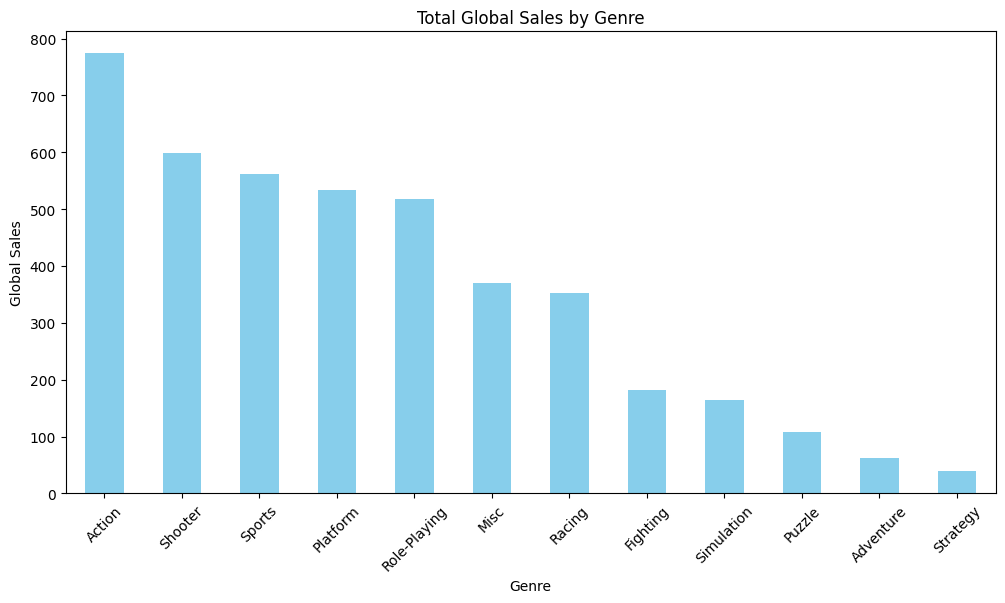

In [146]:
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

## ANALYSIS - 
## 1) There are 12 genre's that are common for the games in the dataset
## 2) The 'Action' genre is the genre with the highest global sales followed by Shooter and Sports
## 3) 'Strategy' genre is the genre with the least global sales.

           Genre  NA_Sales
0        Shooter    318.53
1         Action    316.35
2       Platform    270.61
3         Sports    238.05
4   Role-Playing    179.99
5           Misc    173.81
6         Racing    154.89
7       Fighting     92.49
8     Simulation     64.14
9         Puzzle     29.07
10     Adventure     27.81
11      Strategy     18.91
           Genre  EU_Sales
0         Action    254.92
1         Sports    187.43
2        Shooter    181.01
3       Platform    127.43
4   Role-Playing    118.56
5         Racing    115.97
6           Misc    110.77
7     Simulation     61.16
8       Fighting     43.44
9         Puzzle     25.59
10     Adventure     21.28
11      Strategy     11.91
           Genre  JP_Sales
0   Role-Playing    174.27
1       Platform     93.11
2         Action     55.20
3         Sports     50.54
4           Misc     42.65
5         Racing     37.23
6       Fighting     29.20
7         Puzzle     24.05
8     Simulation     22.68
9        Shooter     14.14
1

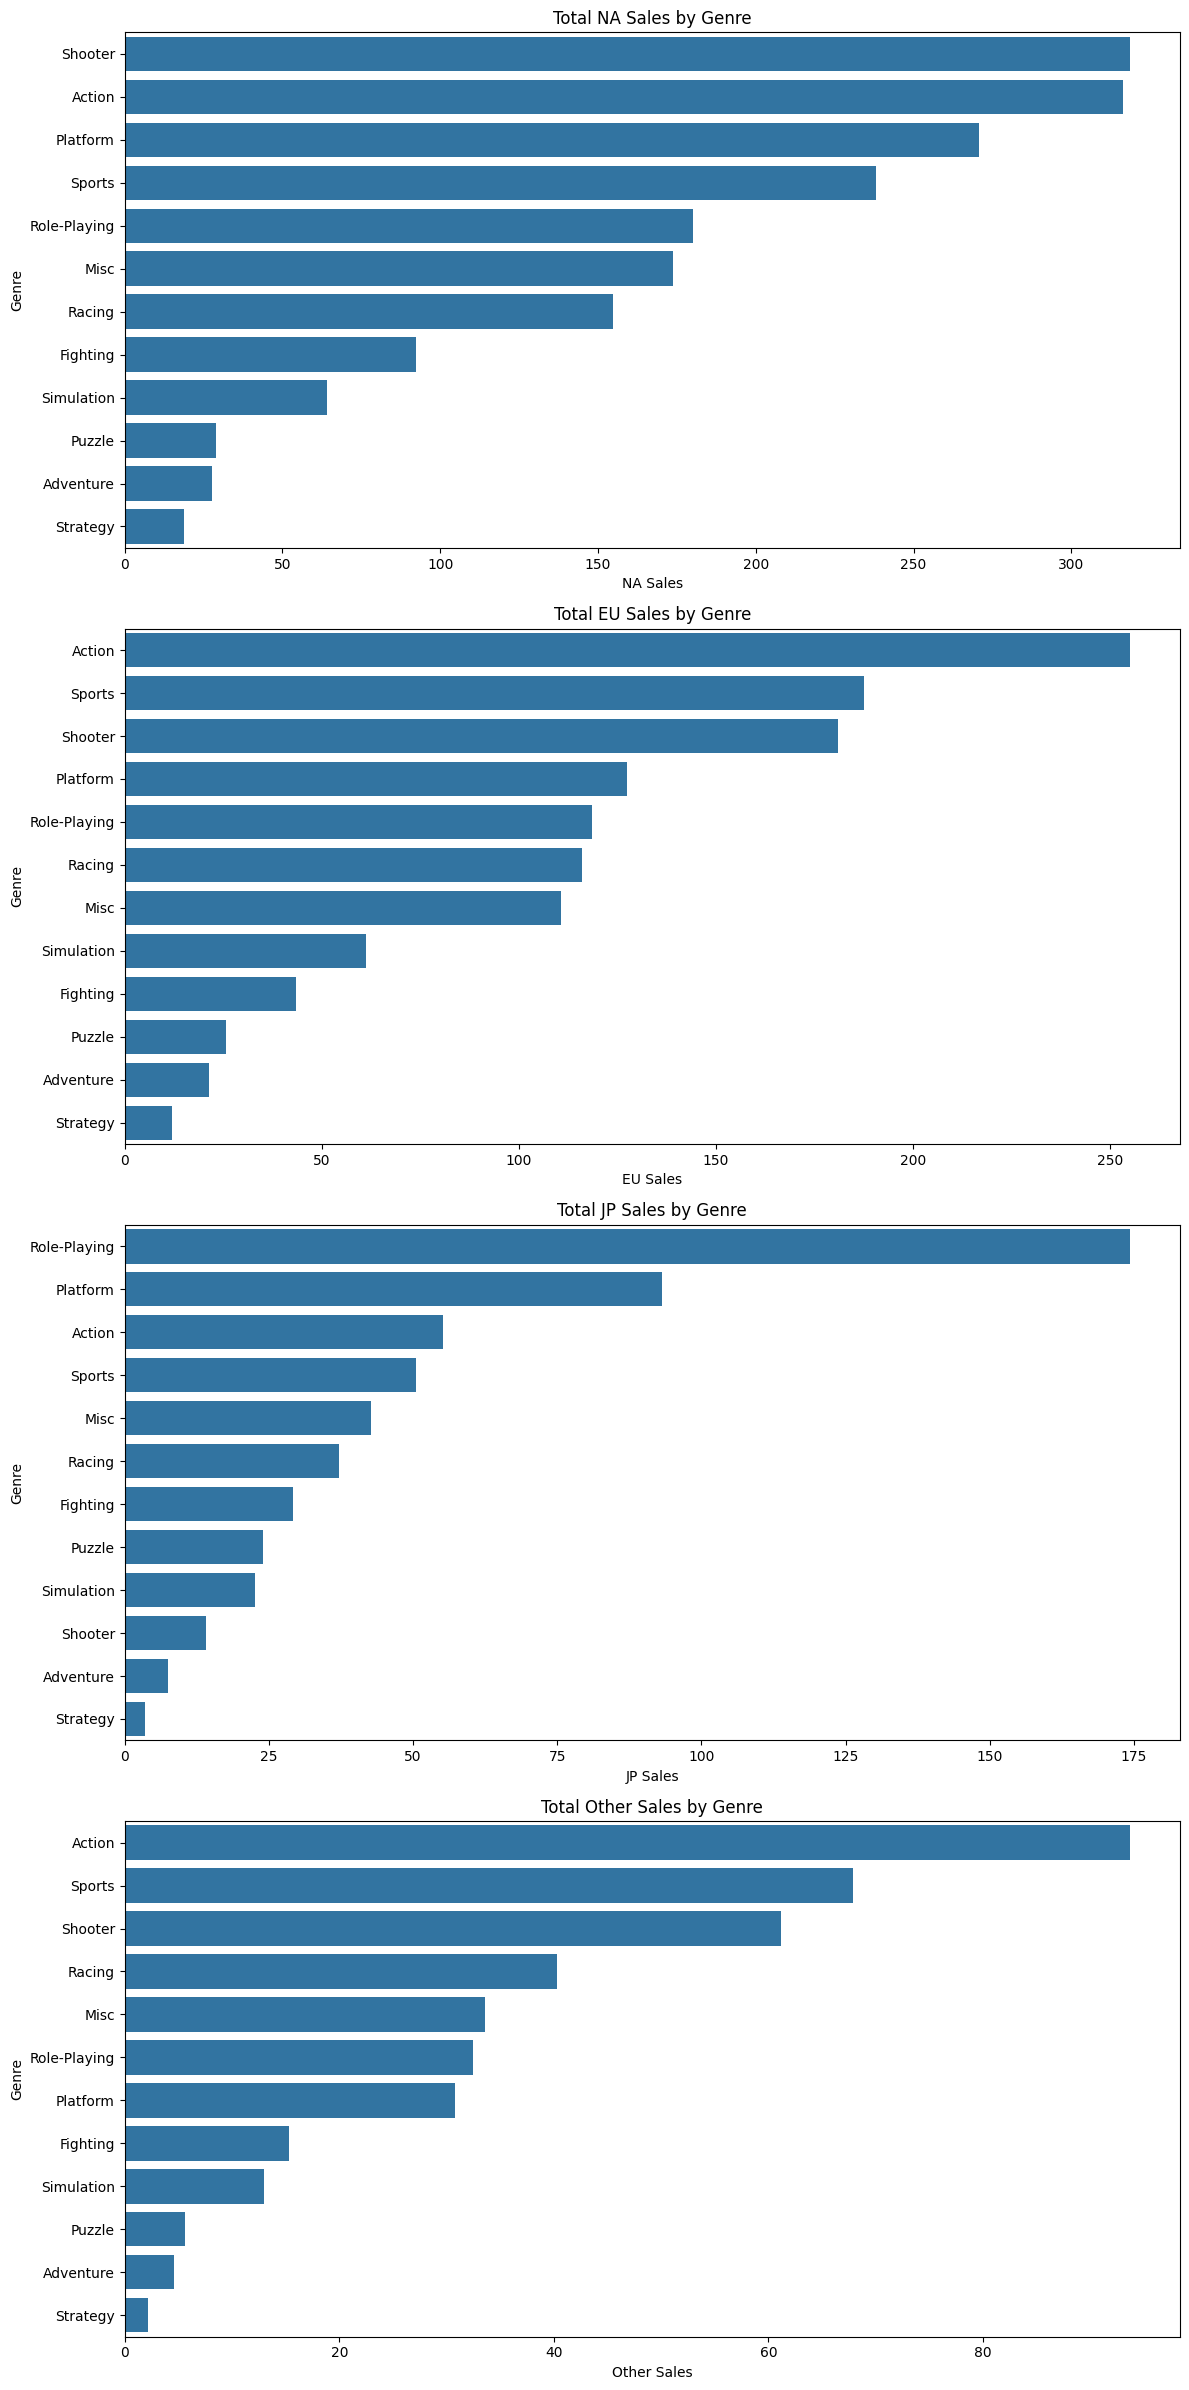

In [147]:
S
eu_sales_by_genre = df2.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).reset_index()
jp_sales_by_genre = df2.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).reset_index()
oth_sales_by_genre = df2.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).reset_index()

print(na_sales_by_genre)
print(eu_sales_by_genre)
print(jp_sales_by_genre)

# Plotting
plt.figure(figsize=(12, 24))  # Adjusted figure size to accommodate all subplots

# NA Sales
plt.subplot(4, 1, 1)
sns.barplot(x='NA_Sales', y='Genre', data=na_sales_by_genre)
plt.title('Total NA Sales by Genre')
plt.xlabel('NA Sales')
plt.ylabel('Genre')

# EU Sales
plt.subplot(4, 1, 2)
sns.barplot(x='EU_Sales', y='Genre', data=eu_sales_by_genre)
plt.title('Total EU Sales by Genre')
plt.xlabel('EU Sales')
plt.ylabel('Genre')

# JP Sales
plt.subplot(4, 1, 3)
sns.barplot(x='JP_Sales', y='Genre', data=jp_sales_by_genre)
plt.title('Total JP Sales by Genre')
plt.xlabel('JP Sales')
plt.ylabel('Genre')

# Other Sales
plt.subplot(4, 1, 4)
sns.barplot(x='Other_Sales', y='Genre', data=oth_sales_by_genre)
plt.title('Total Other Sales by Genre')
plt.xlabel('Other Sales')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

## ANALYSIS -
## 1) The 'Shooter' genre is the most popular genre in North America
## 2) The 'Shooter' genre and 'Action' genre are very close in terms of sales, 'Shooter' being slightly higher
## 3) The 'Role Playing' genre is the highest selling genre in Japan which is very different from the other major regions, which might be possible due to the rise of Anime at the time and the Japanese Culture.

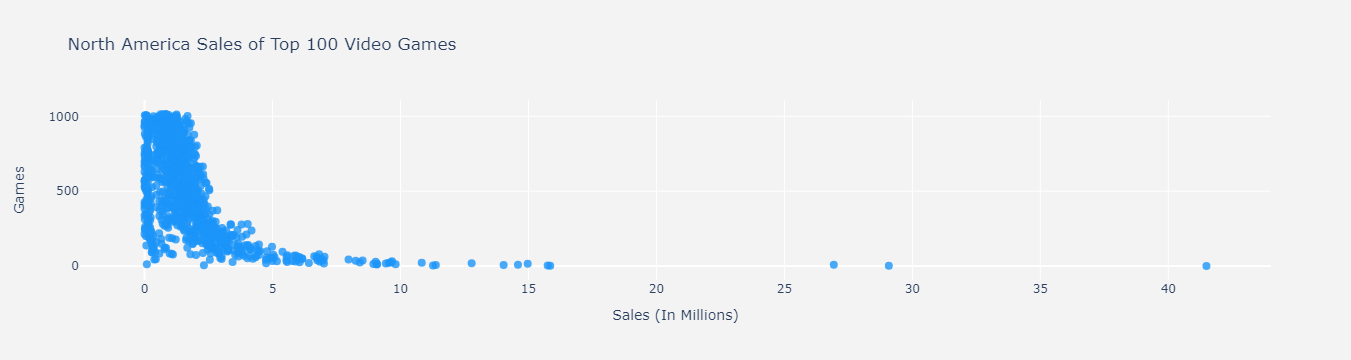

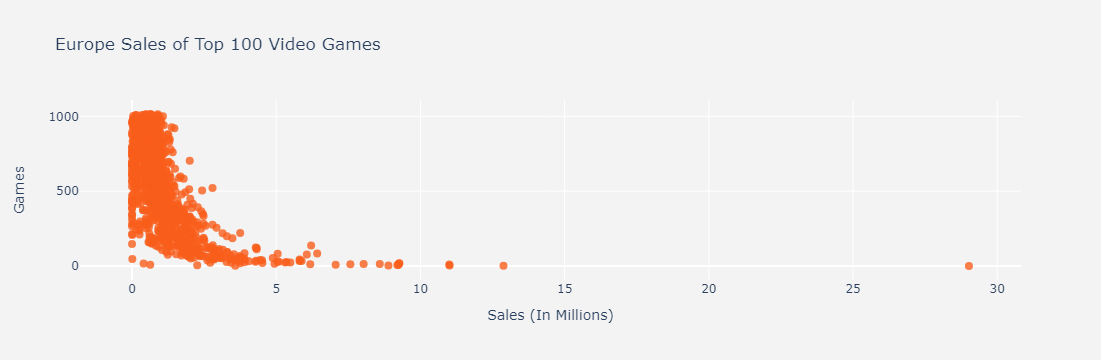

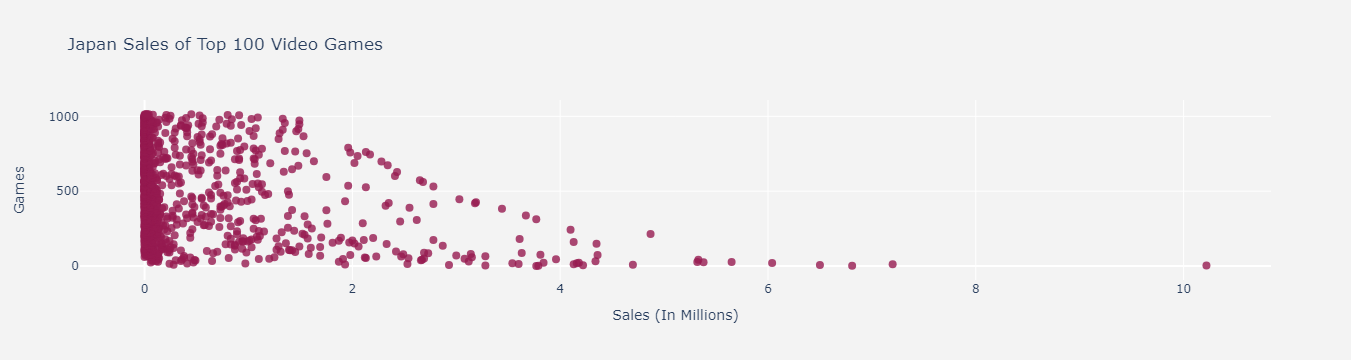

In [148]:
# Create traces for North America
trace1 = go.Scatter(
    x=df2.NA_Sales,
    y=df2.index,
    mode="markers",
    name="North America",
    marker=dict(color='rgba(28, 149, 249, 0.8)', size=8),
    text=df2.Name,  # Change the text to 'Name'
    orientation='h'  # Horizontal orientation
)

layout1 = dict(
    title='North America Sales of Top 100 Video Games',
    xaxis=dict(title='Sales (In Millions)'),
    yaxis=dict(title='Games'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig1 = go.Figure(data=[trace1], layout=layout1)

# Create traces for Europe
trace2 = go.Scatter(
    x=df2.EU_Sales,
    y=df2.index,
    mode="markers",
    name="Europe",
    marker=dict(color='rgba(249, 94, 28, 0.8)', size=8),
    text=df2.Name,  # Change the text to 'Name'
    orientation='h'  # Horizontal orientation
)

layout2 = dict(
    title='Europe Sales of Top 100 Video Games',
    xaxis=dict(title='Sales (In Millions)'),
    yaxis=dict(title='Games'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig2 = go.Figure(data=[trace2], layout=layout2)

# Create traces for Japan
trace3 = go.Scatter(
    x=df2.JP_Sales,
    y=df2.index,
    mode="markers",
    name="Japan",
    marker=dict(color='rgba(150, 26, 80, 0.8)', size=8),
    text=df2.Name,  # Change the text to 'Name'
    orientation='h'  # Horizontal orientation
)

layout3 = dict(
    title='Japan Sales of Top 100 Video Games',
    xaxis=dict(title='Sales (In Millions)'),
    yaxis=dict(title='Games'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig3 = go.Figure(data=[trace3], layout=layout3)

# Plot the figures
iplot(fig1)
iplot(fig2)
iplot(fig3)

## ANALYSIS -
## 1) A general trend of most games only being able to have sales in the range of 0 to 6 Million while very few games are able to reach sales upwards of 10 Million.
## 2) Wii Sports has the highest sales of any game in a region with a staggering 40 Million in Sales in North America alone.
## 3) In Japan, the highest selling game is not Wii Sports which was the common trend in the other regions, which could be due to 'Role-Playing' being the highest selling genre. It is Pokemon Red/ Pokemon Blue, which is a Role-Playing game.

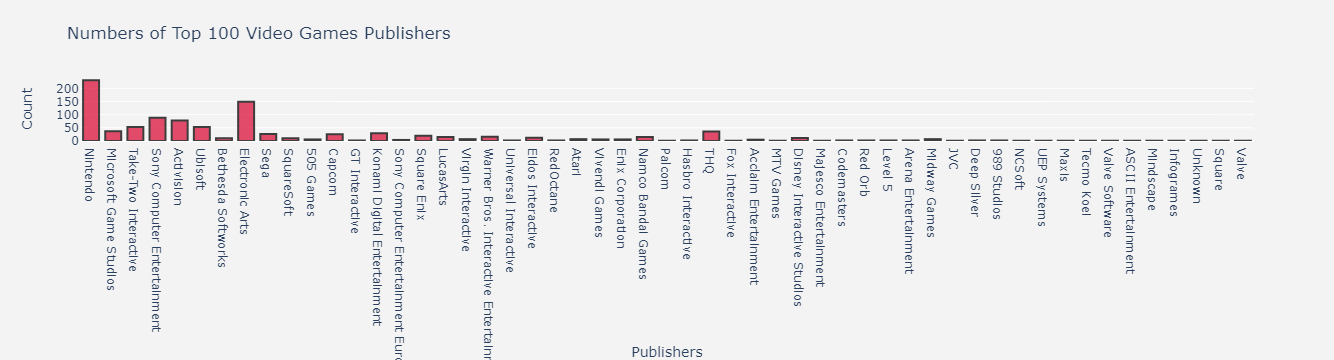

In [150]:
trace = go.Histogram(x=df2.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## ANALYSIS -
## 1) Nintendo is the Publisher with the most games sold with 230, followed by Electronic Arts(EA) coming in at 149 games.

### Frequency Distribution

##### The initial phase of an analysis entails gaining insights into the behavior of the variables being studied. Employing statistical methods like frequency tables, histograms, and bar graphs enables a deeper comprehension of how the phenomena in question are distributed.

In [151]:
freq_year = pd.DataFrame({
    'Frequency': df2['Year'].value_counts(),
    'Percent': df2['Year'].value_counts(normalize=True) * 100
})

# Sort the DataFrame by Frequency in descending order
freq_year = freq_year.sort_values(by='Frequency', ascending=False)

print(freq_year)

      Frequency  Percent
Year                    
2007         71      7.1
2008         69      6.9
2010         67      6.7
2009         61      6.1
2011         56      5.6
2013         54      5.4
2001         53      5.3
2002         50      5.0
2004         47      4.7
2014         44      4.4
2006         44      4.4
2003         41      4.1
2012         38      3.8
2005         36      3.6
1998         35      3.5
2015         35      3.5
1999         27      2.7
2000         26      2.6
1997         24      2.4
1996         21      2.1
1992         14      1.4
1994         13      1.3
1995         12      1.2
1986          8      0.8
1989          7      0.7
1993          7      0.7
1990          7      0.7
1988          6      0.6
1991          6      0.6
1984          5      0.5
2016          5      0.5
1987          5      0.5
1985          3      0.3
1983          3      0.3


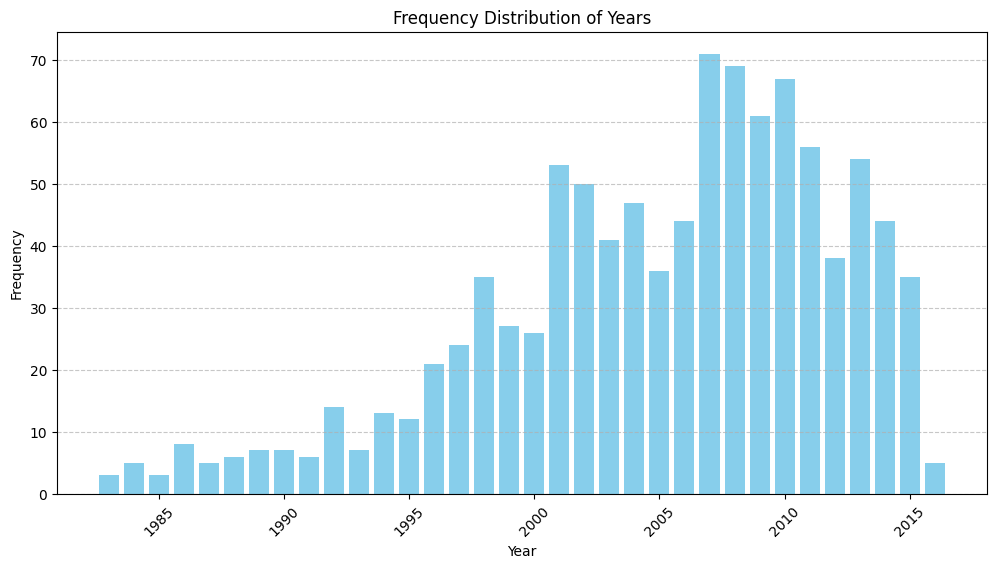

In [152]:
plt.figure(figsize=(12, 6))
plt.bar(freq_year.index, freq_year['Frequency'], color='skyblue')
plt.title('Frequency Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ANALYSIS -
## 1) 2007 is the year with the most games released with more than 70 games released in that year alone.
## 2) We can see an upward trend in games being released as time goes which could show that more games are being released as the popularity of video games increases
## 3)From 2014 to 2015, we see a very sudden drop in games being released.

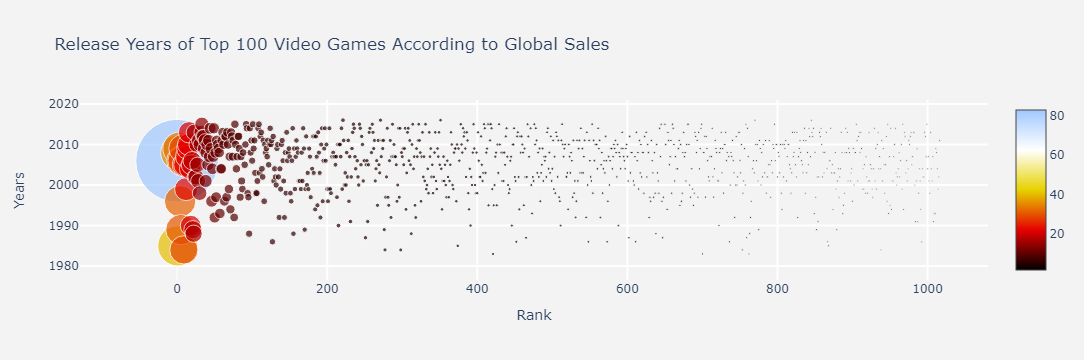

In [153]:
fig={
    "data" : [
    {
        'x': df2.index,
        'y': df2.Year,
        'mode': 'markers',
        'marker': {
            "color":df2.Global_Sales,
            'size': df2.Global_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ df2.Name +","+" Publisher:" + df2.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Global Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

### ANALYSIS -
## 1)The bubble chart above visualizes the relationship between game release years, rankings, and global sales. The size and color of the bubbles represent the magnitude of global sales, while the game titles, along with their respective publishers, are provided. Notably, the first 15 games in the chart are developed and released by Nintendo. Additionally, the chart indicates the distribution of publishers for the top 100 games.

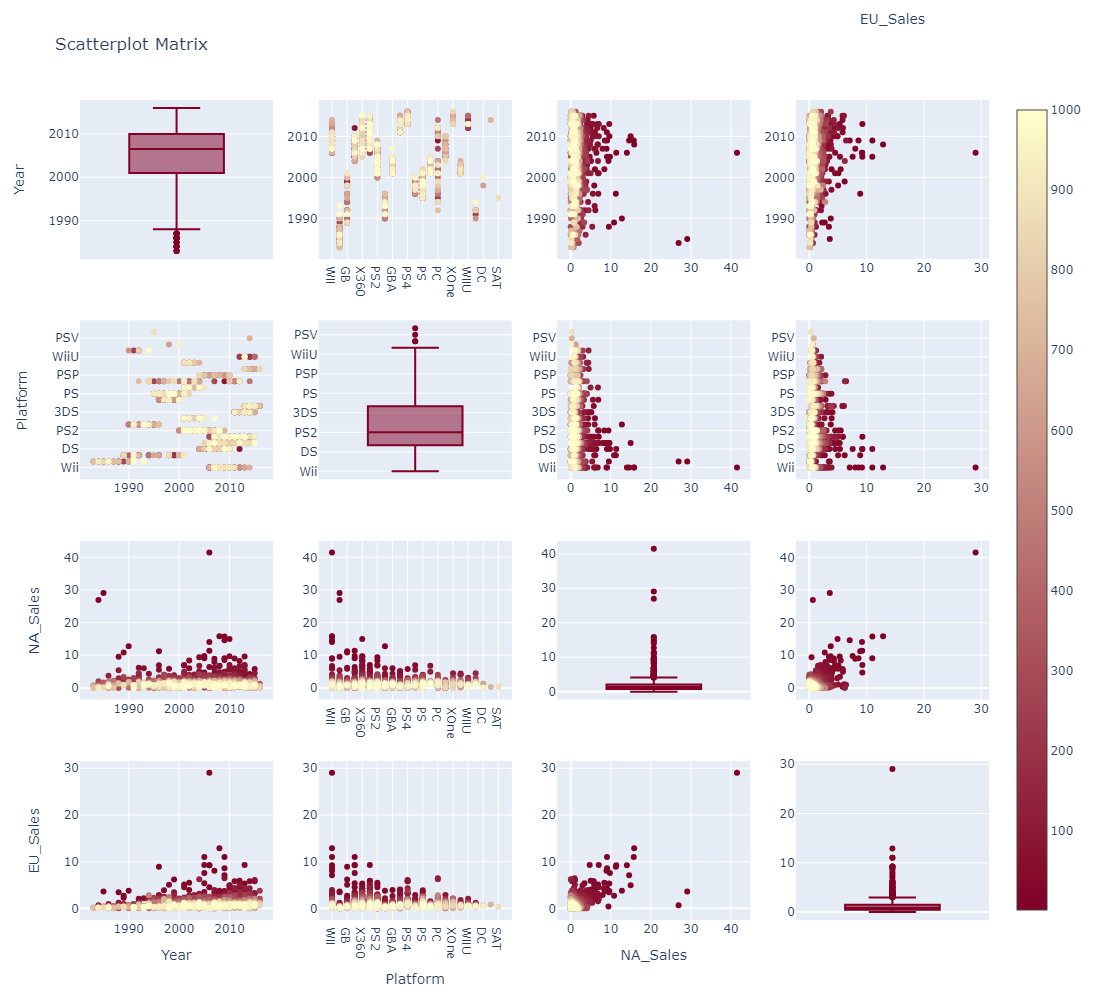

In [154]:
df3 = df2.loc[:,["Year","Platform","NA_Sales","EU_Sales" ]]

df3["index"] = np.arange(1,len(df2)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(df3, diag='box', index='index',colormap='YlOrRd',
                                  colormap_type='seq',
                                  height=1000, width=1200)
iplot(fig)

### ANALYSIS -
## ScatterPlot Matrix shows relationships between top 100 Video Games according to Year, Platform, North America and Europe Sales.

In [155]:
xaction=df2[df2.Genre=="Action"]
xsports=df2[df2.Genre=="Sports"]
xmisc=df2[df2.Genre=="Misc"]
xrole=df2[df2.Genre=="Role-Playing"]
xshooter=df2[df2.Genre=="Shooter"]
xadventure=df2[df2.Genre=="Adventure"]
xrace=df2[df2.Genre=="Racing"]
xplatform=df2[df2.Genre=="Platform"]
xsimulation=df2[df2.Genre=="Simulation"]
xfight=df2[df2.Genre=="Fighting"]
xstrategy=df2[df2.Genre=="Strategy"]
xpuzzle=df2[df2.Genre=="Puzzle"]

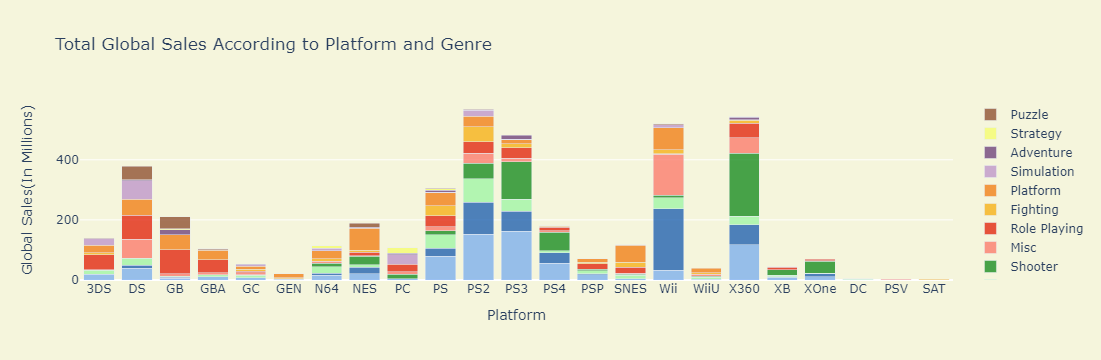

In [157]:
trace1 = go.Bar(
    x=xaction.groupby("Platform")["Global_Sales"].sum().index,
    y=xaction.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
trace2 = go.Bar(
    x=xsports.groupby("Platform")["Global_Sales"].sum().index,
    y=xsports.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
trace3 = go.Bar(
    x=xrace.groupby("Platform")["Global_Sales"].sum().index,
    y=xrace.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
trace4 = go.Bar(
    x=xshooter.groupby("Platform")["Global_Sales"].sum().index,
    y=xshooter.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
trace5 = go.Bar(
    x=xmisc.groupby("Platform")["Global_Sales"].sum().index,
    y=xmisc.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
trace6 = go.Bar(
    x=xrole.groupby("Platform")["Global_Sales"].sum().index,
    y=xrole.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
trace7 = go.Bar(
    x=xfight.groupby("Platform")["Global_Sales"].sum().index,
    y=xfight.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
trace8 = go.Bar(
    x=xplatform.groupby("Platform")["Global_Sales"].sum().index,
    y=xplatform.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
trace9 = go.Bar(
    x=xsimulation.groupby("Platform")["Global_Sales"].sum().index,
    y=xsimulation.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
trace10 = go.Bar(
    x=xadventure.groupby("Platform")["Global_Sales"].sum().index,
    y=xadventure.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
trace11 = go.Bar(
    x=xstrategy.groupby("Platform")["Global_Sales"].sum().index,
    y=xstrategy.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
trace12 = go.Bar(
    x=xpuzzle.groupby("Platform")["Global_Sales"].sum().index,
    y=xpuzzle.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### ANALYSIS -
# 1) Games sold on the PS2 made the most number of sales globally.
# 2) Most games were sold on the PS2, followed by the XBox 360 and then the PS3

In [170]:
genre=pd.DataFrame(df2.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(df2["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
print(genre)
print(genrecount)
genre=pd.merge(genre,genrecount,on="Genre")

           Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0         Action    316.35    254.92     55.20        93.67        773.78
1      Adventure     27.81     21.28      7.54         4.60         62.18
2       Fighting     92.49     43.44     29.20        15.28        182.79
3           Misc    173.81    110.77     42.65        33.57        369.45
4       Platform    270.61    127.43     93.11        30.82        534.11
5         Puzzle     29.07     25.59     24.05         5.65        108.04
6         Racing    154.89    115.97     37.23        40.28        351.72
7   Role-Playing    179.99    118.56    174.27        32.49        518.29
8        Shooter    318.53    181.01     14.14        61.15        598.05
9     Simulation     64.14     61.16     22.68        12.95        164.65
10        Sports    238.05    187.43     50.54        67.92        561.10
11      Strategy     18.91     11.91      3.49         2.13         40.04
           Genre  count
0         Acti

In [171]:
table_data=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
table_data = table_data.rename(columns = {"NA_Sales": "North America", 
                                  "EU_Sales":"Europe", 
                                  "JP_Sales": "Japan","Other_Sales":"Other","Global_Sales":"Total"})

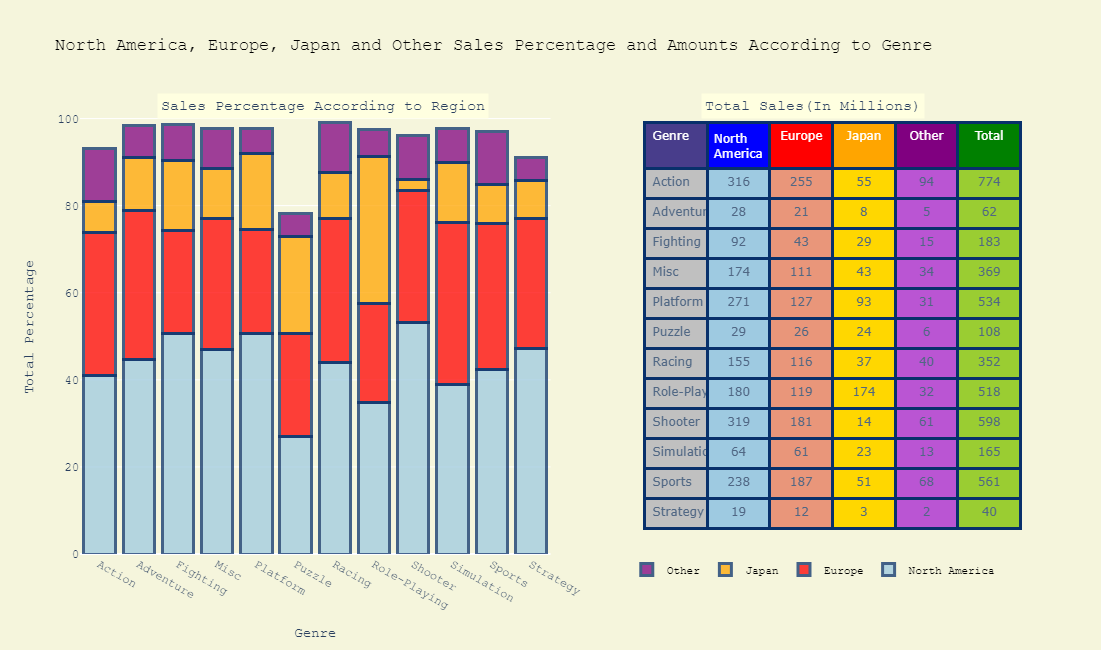

In [172]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100)

trace1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
trace3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
trace4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["North America"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### ANALYSIS -
# 1)'Puzzle' genre has the least sales percentage per region.
# 2) 'Strategy' genre has the least global sales.

In [174]:
df1000=df2.iloc[:1000,:]
df1000["normsales"] = (df1000["Global_Sales"] - np.min(df1000["Global_Sales"]))/(np.max(df1000["Global_Sales"])-np.min(df1000["Global_Sales"]))

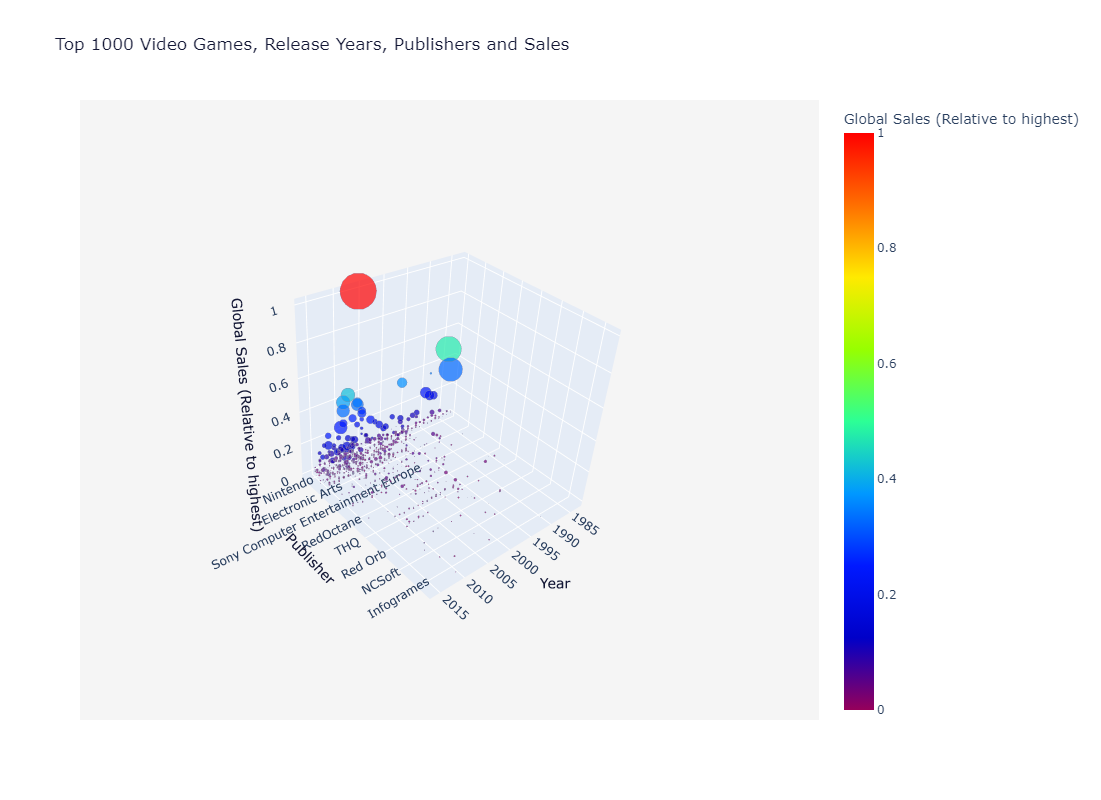

In [180]:
df1000.index=df1000.index.astype("str")
df1000.Global_Sales=df1000.Global_Sales.astype("str")
trace1 = go.Scatter3d(
    y=df1000["Publisher"],
    x=df1000["Year"],
    z=df1000["normsales"],
    text="Name:"+ df1000.Name +","+" Rank:" + df1000.index + " Global Sales: " + df1000["Global_Sales"] +" millions",
    mode='markers',
    marker=dict(
        size=df1000['NA_Sales'],
        color = df1000['normsales'],
        colorscale = "Rainbow",
        colorbar = dict(title = 'Global Sales (Relative to highest)'),
        line=dict(color='rgb(140, 140, 170)'),
       
    )
)

data=[trace1]

layout=go.Layout(height=800, width=800, title='Top 1000 Video Games, Release Years, Publishers and Sales',
            titlefont=dict(color='rgb(20, 24, 54)'),
            scene = dict(xaxis=dict(title='Year',
                                    titlefont=dict(color='rgb(20, 24, 54)')),
                            yaxis=dict(title='Publisher',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            zaxis=dict(title='Global Sales (Relative to highest)',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            bgcolor = 'whitesmoke'
                           ))
 
fig=go.Figure(data=data, layout=layout)
iplot(fig)

### ANALYSIS -
# 1) This 3D Scatter plot shows the plot between Year, Publisher & Global Sales.
# 2) We see the larger the bubble that much bigger was the global sales of the particular game'
# 3) Wii Sports dominates the market with 82 Million in Sales and the biggest game in the dataset.